In [5]:
import os
import glob
import pandas as pd
from PIL import Image
import base64
from io import BytesIO
from IPython.display import HTML

def image_to_base64(image):
    """Converts an image to base64 for displaying in notebooks."""
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

def get_image_info(directory):
    data = []
    
    image_files = glob.glob(os.path.join(directory, "*.[pjPJ]*[npNP]*[geGE]*"))
    
    for filepath in image_files:
        filename = os.path.basename(filepath)
        
        try:
            with Image.open(filepath) as img:
                color_model = img.mode
                format = img.format
                channels = len(img.getbands())
                width, height = img.size
                img_size = os.path.getsize(filepath) / (1024 * 1024)
                
                img_resized = img.resize((width // 4, height // 4))
                img_resized_base64 = image_to_base64(img_resized)
                
                data.append({
                    'Filename': filename,
                    'Color Model': color_model,
                    'Format': format,
                    'Channels': channels,
                    'Size (MB)': round(img_size, 2),
                    'Width': width,
                    'Height': height,
                    'Full Path': filepath,
                    'Resized Image': img_resized_base64
                })
        
        except Exception as e:
            print(f"Could not process file {filename}: {e}")
    
    df = pd.DataFrame(data)
    return df

def render_images(df):
    """Display base64 images in Jupyter notebook with proper table layout."""
    html = "<table border='1' style='border-collapse: collapse;'>"
    html += "<tr><th>Filename</th><th>Color Model</th><th>Format</th><th>Channels</th><th>Size (MB)</th><th>Width</th><th>Height</th><th>Resized Image</th></tr>"
    for _, row in df.iterrows():
        html += f'<tr>'
        html += f'<td>{row["Filename"]}</td>'
        html += f'<td>{row["Color Model"]}</td>'
        html += f'<td>{row["Format"]}</td>'
        html += f'<td>{row["Channels"]}</td>'
        html += f'<td>{row["Size (MB)"]}</td>'
        html += f'<td>{row["Width"]}</td>'
        html += f'<td>{row["Height"]}</td>'
        html += f'<td><img src="data:image/png;base64,{row["Resized Image"]}" width="100"/></td>'
        html += '</tr>'
    html += "</table>"
    return HTML(html)

Filename,Color Model,Format,Channels,Size (MB),Width,Height,Resized Image
cat14.jpeg,RGB,JPEG,3,0.01,343,147,
cat15.jpeg,RGB,JPEG,3,0.58,2400,1334,
cat1.jpg,RGB,JPEG,3,0.05,686,386,
cat2.jpg,RGB,JPEG,3,0.09,720,719,
cat11.jpg,RGB,JPEG,3,0.03,320,427,
cat7.jpg,RGB,JPEG,3,0.15,1200,1199,
cat6.jpg,RGB,JPEG,3,0.65,1920,1328,
cat12.jpg,RGB,JPEG,3,0.48,2064,1410,
cat4.jpg,RGB,JPEG,3,0.13,1200,734,
cat5.jpg,RGB,JPEG,3,0.12,720,719,

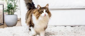
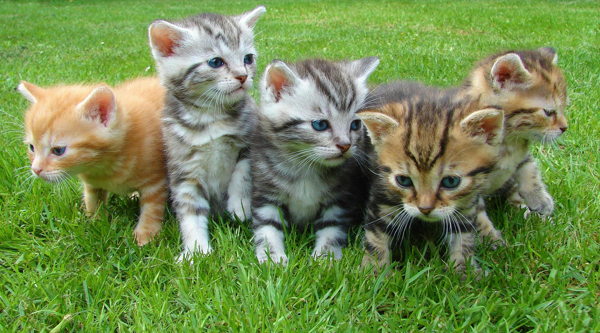
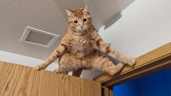
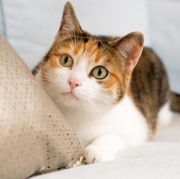
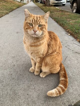
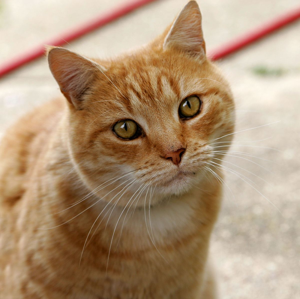
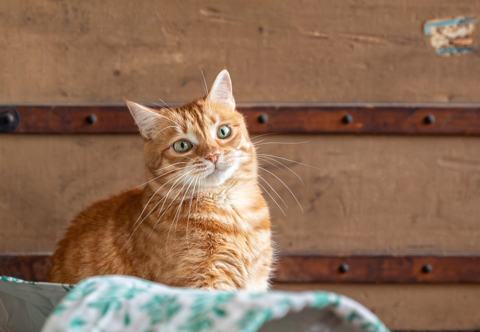
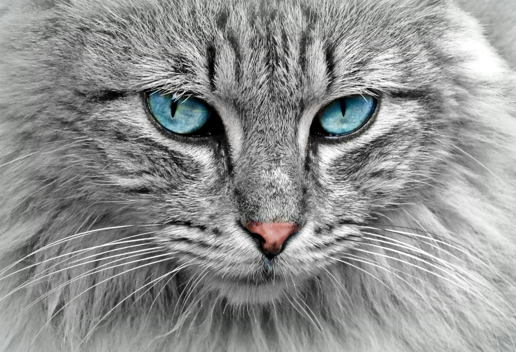
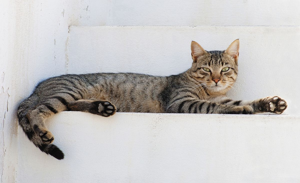
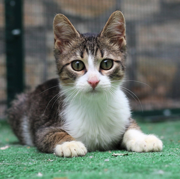
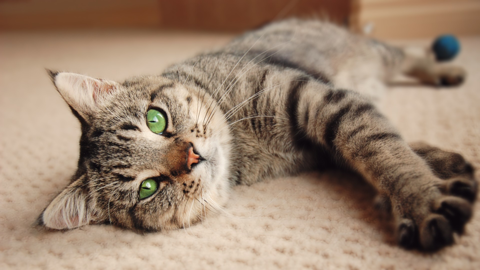
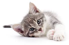

In [10]:
dataset_directory = './dataset/'
df = get_image_info(dataset_directory)

render_images(df)

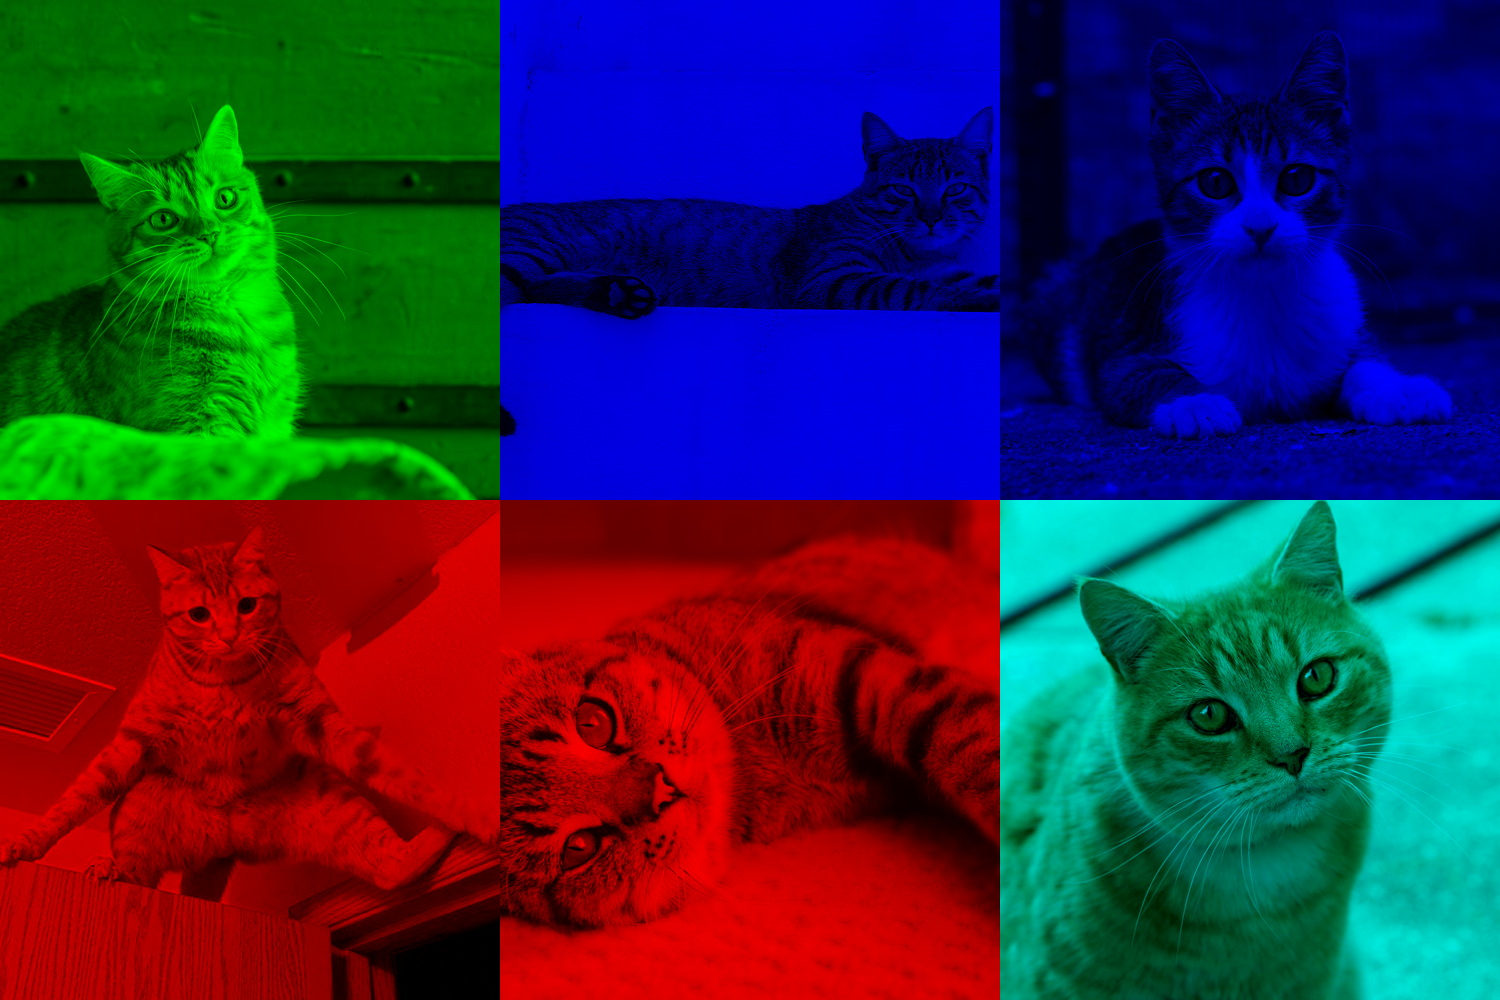

In [16]:
import os
import random
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
from IPython.display import display

def random_color_filter(image):
    """Apply a random color filter (Red, Green, Blue, Yellow, Purple, Cyan) on the image."""
    filters = {
        'red': [1, 0, 0],    # Red filter
        'green': [0, 1, 0],  # Green filter
        'blue': [0, 0, 1],   # Blue filter
        'yellow': [1, 1, 0], # Yellow filter
        'purple': [1, 0, 1], # Purple filter
        'cyan': [0, 1, 1],   # Cyan filter
    }
    
    # Randomly choose one filter
    filter_color = random.choice(list(filters.values()))
    
    # Convert the image to numpy array and apply the filter
    img_array = np.array(image)
    img_array[..., 0] = img_array[..., 0] * filter_color[0]  # Red channel
    img_array[..., 1] = img_array[..., 1] * filter_color[1]  # Green channel
    img_array[..., 2] = img_array[..., 2] * filter_color[2]  # Blue channel
    
    return Image.fromarray(np.uint8(img_array))

def crop_to_square(image):
    """Crop the image to a square with the maximum possible size."""
    width, height = image.size
    min_side = min(width, height)
    
    left = (width - min_side) / 2
    top = (height - min_side) / 2
    right = (width + min_side) / 2
    bottom = (height + min_side) / 2
    
    return image.crop((left, top, right, bottom))

def create_poster(directory, output_name, n_cols, n_rows):
    """Create a poster from randomly selected images."""
    # Get all image files in the directory
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) and f.endswith(('jpg', 'jpeg', 'png', 'webp'))]
    
    # Load images, crop to square, apply random filters, and resize to 500x500
    images = []
    for _ in range(n_cols * n_rows):
        # Randomly pick an image
        random_image_path = os.path.join(directory, random.choice(image_files))
        with Image.open(random_image_path) as img:
            # Crop to square and apply a filter
            img = crop_to_square(img)
            img = random_color_filter(img)
            img = img.resize((500, 500))
            images.append(img)
    
    # Create the poster grid
    poster_width = n_cols * 500
    poster_height = n_rows * 500
    poster = Image.new('RGB', (poster_width, poster_height))
    
    # Paste images into the poster
    for i in range(n_rows):
        for j in range(n_cols):
            img_index = i * n_cols + j
            x_offset = j * 500
            y_offset = i * 500
            poster.paste(images[img_index], (x_offset, y_offset))
    
    # Save the final poster
    poster.save(output_name)

    # Display the poster in Jupyter Notebook
    display(poster)

# Example usage:
dataset_directory = './dataset/'
output_file = './poster.jpg'
n_cols = 3  # Number of images in a row
n_rows = 2  # Number of images in a column

create_poster(dataset_directory, output_file, n_cols, n_rows)